In [44]:
import pandas as pd
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from  sklearn.model_selection import learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge
import statsmodels.api as sm

In [27]:
banking = pd.read_csv('../linear_regression_case_study/SRC/banking.csv')
banking.head()

,interest_rate,fico_range,amount_requested,amount_funded_by_investors,loan_length
0,8.90,735-739,20000.0,20000.0,36.0
1,12.12,715-719,19200.0,19200.0,36.0
2,21.98,690-694,35000.0,35000.0,60.0
3,9.99,695-699,10000.0,9975.0,36.0
4,11.71,695-699,12000.0,12000.0,36.0


In [28]:
banking.T

,0,1,2,3,4,5,6,7,8,9,...,2488,2489,2490,2491,2492,2493,2494,2495,2496,2497
interest_rate,8.9,12.12,21.98,9.99,11.71,15.31,7.9,17.14,14.33,6.91,...,11.71,7.62,10.08,23.28,14.65,16.77,14.09,13.99,12.42,13.79
fico_range,735-739,715-719,690-694,695-699,695-699,670-674,720-724,705-709,685-689,715-719,...,710-714,720-724,710-714,675-679,685-689,705-709,740-744,680-684,675-679,670-674
amount_requested,20000.0,19200.0,35000.0,10000.0,12000.0,6000.0,10000.0,33500.0,14675.0,7000.0,...,10000.0,8475.0,6400.0,30000.0,24000.0,30000.0,16000.0,10000.0,6000.0,9000.0
amount_funded_by_investors,20000.0,19200.0,35000.0,9975.0,12000.0,6000.0,10000.0,33450.0,14675.0,7000.0,...,10000.0,8475.0,6350.0,30000.0,23975.0,29950.0,16000.0,10000.0,6000.0,5242.75
loan_length,36.0,36.0,60.0,36.0,36.0,36.0,36.0,60.0,36.0,36.0,...,36.0,36.0,36.0,60.0,36.0,60.0,60.0,36.0,36.0,36.0


In [29]:
# fico= np.array(banking['fico_range'])

# fico_range = []
# for x in fico:
#     fico_range.append(x.split('-'))

# fico_range = pd.DataFrame(fico_range)

In [30]:
banking['fico_range'] = banking['fico_range'].apply(lambda x: int(x.split('-')[0]))

In [36]:
banking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   interest_rate               2498 non-null   float64
 1   fico_range                  2498 non-null   int64  
 2   amount_requested            2498 non-null   float64
 3   amount_funded_by_investors  2498 non-null   float64
 4   loan_length                 2498 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 97.7 KB


In [31]:
banking.T

,0,1,2,3,4,5,6,7,8,9,...,2488,2489,2490,2491,2492,2493,2494,2495,2496,2497
interest_rate,8.9,12.12,21.98,9.99,11.71,15.31,7.9,17.14,14.33,6.91,...,11.71,7.62,10.08,23.28,14.65,16.77,14.09,13.99,12.42,13.79
fico_range,735.0,715.00,690.00,695.00,695.00,670.00,720.0,705.00,685.00,715.00,...,710.00,720.00,710.00,675.00,685.00,705.00,740.00,680.00,675.00,670.00
amount_requested,20000.0,19200.00,35000.00,10000.00,12000.00,6000.00,10000.0,33500.00,14675.00,7000.00,...,10000.00,8475.00,6400.00,30000.00,24000.00,30000.00,16000.00,10000.00,6000.00,9000.00
amount_funded_by_investors,20000.0,19200.00,35000.00,9975.00,12000.00,6000.00,10000.0,33450.00,14675.00,7000.00,...,10000.00,8475.00,6350.00,30000.00,23975.00,29950.00,16000.00,10000.00,6000.00,5242.75
loan_length,36.0,36.00,60.00,36.00,36.00,36.00,36.0,60.00,36.00,36.00,...,36.00,36.00,36.00,60.00,36.00,60.00,60.00,36.00,36.00,36.00


In [32]:
banking.isnull().sum()

interest_rate                 0
fico_range                    0
amount_requested              0
amount_funded_by_investors    0
loan_length                   0
dtype: int64

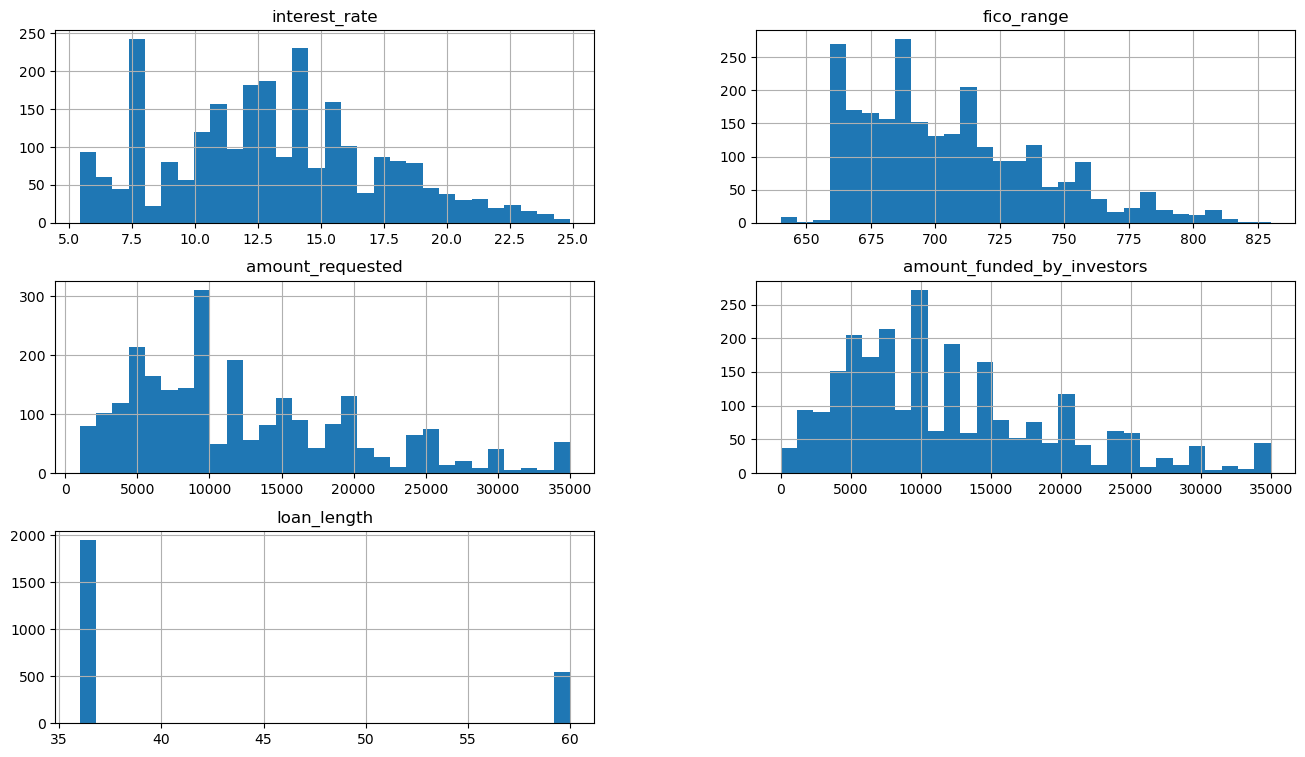

In [40]:
banking.hist(bins=30,figsize=(16,9))
plt.show()

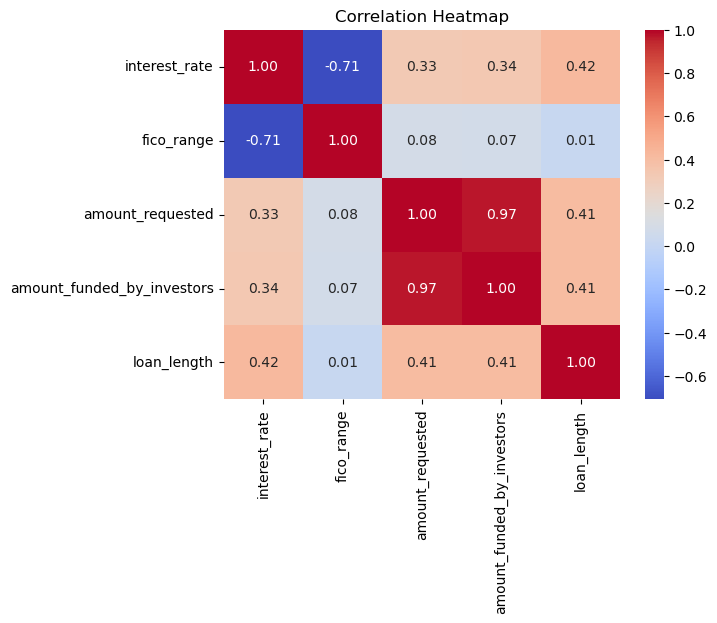

In [33]:
sns.heatmap(banking.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

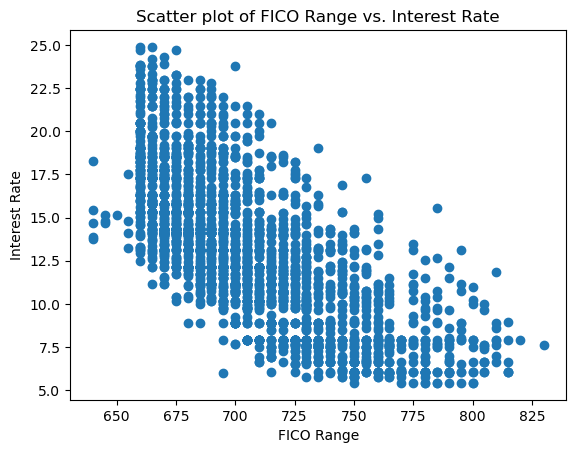

In [34]:
plt.scatter(banking['fico_range'], banking['interest_rate'])
plt.xlabel('FICO Range')
plt.ylabel('Interest Rate')
plt.title('Scatter plot of FICO Range vs. Interest Rate')
plt.show()

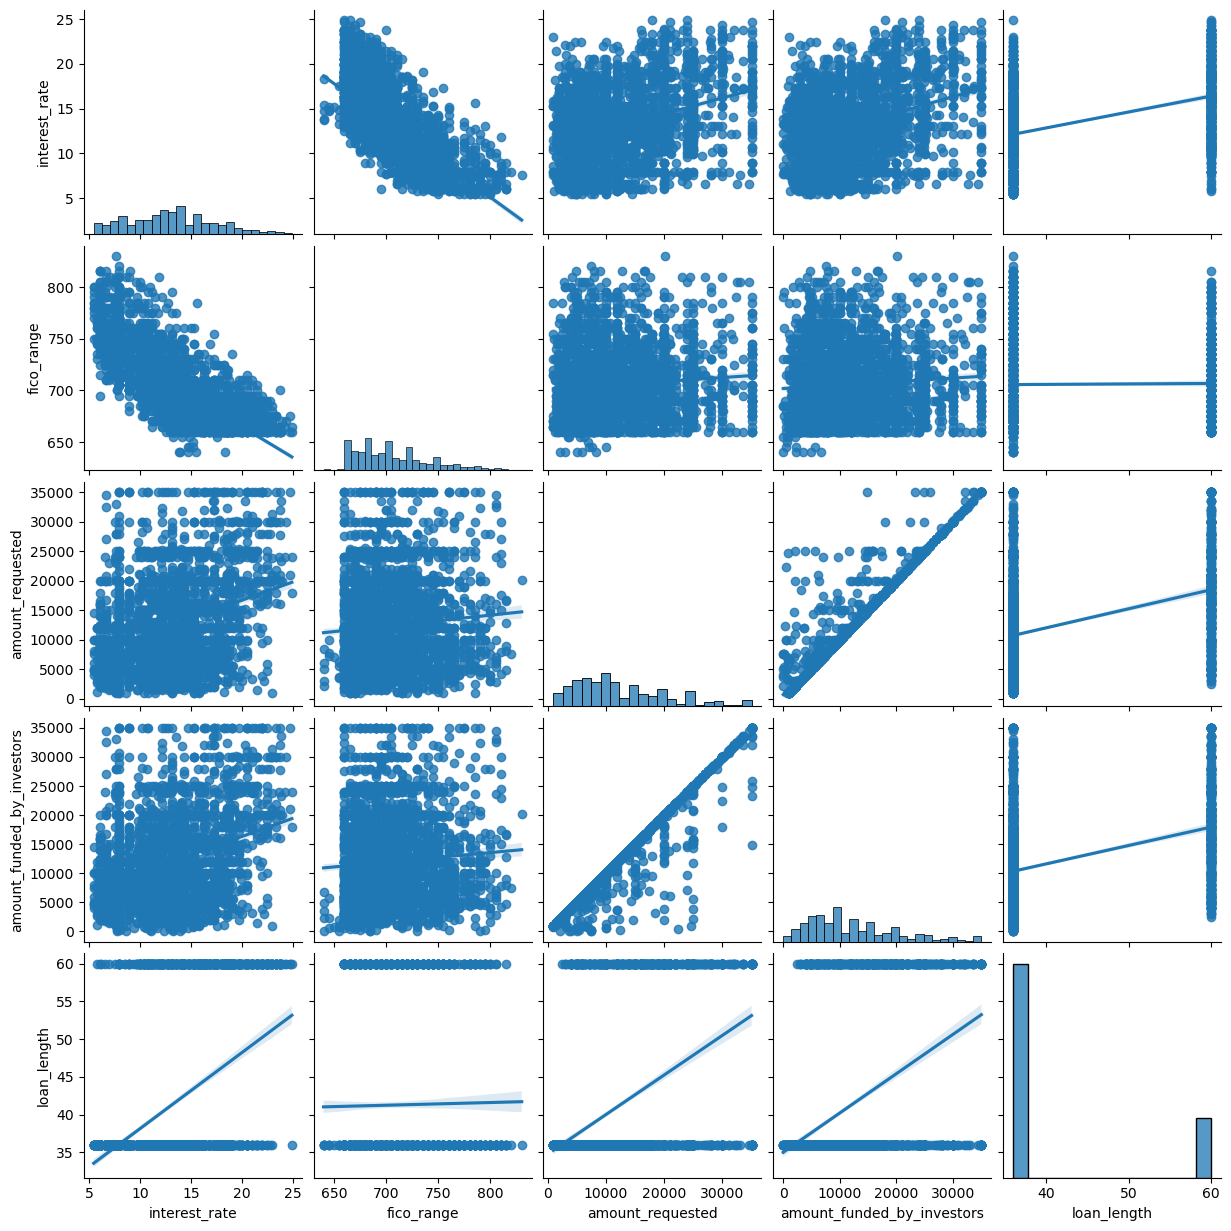

In [43]:
sns.pairplot(banking, kind='reg')
plt.show()

In [46]:
y = banking['interest_rate']
X = banking[['fico_range']]

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          interest_rate   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     2526.
Date:                Thu, 27 Jul 2023   Prob (F-statistic):               0.00
Time:                        15:02:27   Log-Likelihood:                -6242.5
No. Observations:                2498   AIC:                         1.249e+04
Df Residuals:                    2496   BIC:                         1.250e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         72.8388      1.191     61.175      0.0